$$\Large \color{blue}{\textbf{Model Bias and Variance Diagnostic with Learning Curve}}$$

$$\small \color{green}{\textbf{Written and Coded by}}$$
$$\large \color{green}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$

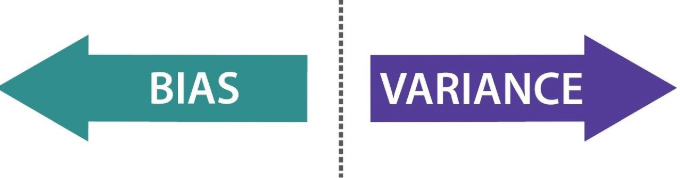

# What is Learning Curve and Its Roles?

Generally, a learning curve is a plot that shows time or experience on the x-axis and learning or improvement on the y-axis.

- Learning curves are plots that show changes in learning performance over time in terms of experience.
- Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.
- Learning curves of model performance can be used to diagnose whether the train or validation datasets are not relatively representative of the problem domain.
- It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 

# How to measure Learning Curve

The metric used to evaluate learning could be maximizing, meaning that better scores (larger numbers) indicate more learning. An example would be classification accuracy.

It is more common to use a score that is minimizing, such as loss or error whereby better scores (smaller numbers) indicate more learning and a value of 0.0 indicates that the training dataset was learned perfectly and no mistakes were made.

During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”

- Train Learning Curve: Learning curve calculated from the training dataset that gives an idea of how well the model is learning.
- Validation Learning Curve: Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.
It is common to create dual learning curves for a machine learning model during training on both the training and validation datasets.

In some cases, it is also common to create learning curves for multiple metrics, such as in the case of classification predictive modeling problems, where the model may be optimized according to cross-entropy loss and model performance is evaluated using classification accuracy. In this case, two plots are created, one for the learning curves of each metric, and each plot can show two learning curves, one for each of the train and validation datasets.

- Optimization Learning Curves: Learning curves calculated on the metric by which the parameters of the model are being optimized, e.g. loss.
- Performance Learning Curves: Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.

# What are Bias, Variance, and Their Relations
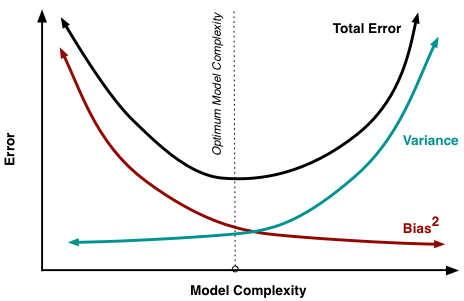

https://towardsdatascience.com/holy-grail-for-bias-variance-tradeoff-overfitting-underfitting-7fad64ab5d76

# Detect the Bias and Variance problems

## The bias problem
### Detect the bias problem

To detect the problem of bias, we have a look at the validation error/score. Indeed, a high validation error/ low validation score implies the problem of bias. However, the nex question is how to know whether a low bias problem or a high bias problem? To find the answer, we need to look at the training error/training score. 

1. A high train error: high bias (low train score)
2. A low train error: low bias (high train score)


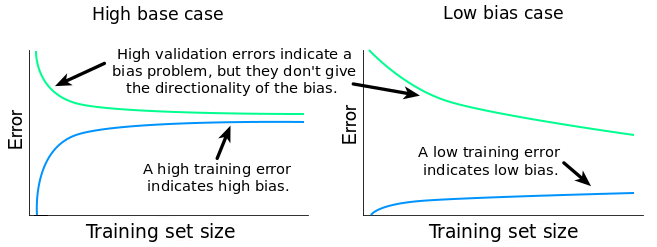



or another approach to detect this issue without using the learning curve as the following links

https://dzone.com/articles/bias-detection-in-machine-learning-models-using-fa


### Solution for the Bias

1. Increase the complexity of the model by adding more features.

2. Increase the complexity of the model by using other complex model.

3. Decreasing the regularization of the current learning algorithm, if that’s the case. In a nutshell, regularization prevents the algorithm from fitting the training data too well. If we decrease regularization, the model will fit training data better, and, as a consequence, the variance will increase and the bias will decrease.

However, it is worthnoting that a model suffers from high Bias. It implies this model also suffers from high variance and underfitting. Thus, a solution which is used to address the problem of high bias and underfitting, will increases the variance. Thus, overfitting will appears.

##  The variance problem
### Dectect the variance problem

How to detect the problem of variance. Two ways are given below:

1. By examining the gap between the validation learning curve and training learning curve: A narrow gap indicates low variance.

2. By examining the training error: its value and its evolution as the training set sizes increase: low train error implies low variance. Conversely, low train error implies high variance.

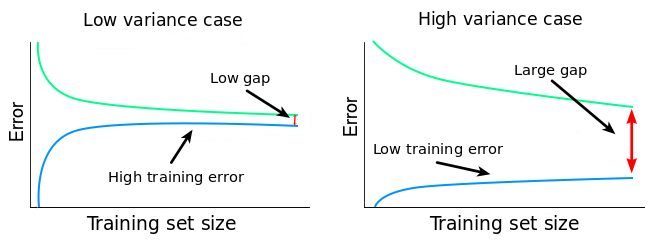

### Solutions for  the variance problem

It is worthnoting that a model suffers from high varaince error. It implies this model also suffers from the low Bias. This is because of the Bias-Variance tradeoff. A model suffers from high variance, low Bias, and Overfitting, the solutions for that could be as follows:
1. Reducing the complexity of model by removing features or a less complex algorithm
2. increasing a number of instances.

# An Empirical Example



To this end, we build regression models that predict the hourly electrical energy output of a power plant. The dataset can be downloaded from the following link.

http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

## Loading Lib

In [1]:
from timeit import default_timer as timer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## Loading data

In [2]:
electricity = pd.read_excel('Folds5x2_pp.xlsx')

## EDA

In [3]:
print(Bold+'The data information'+End)
print(electricity.info())
print(Bold+'The first %d instances:'%len(electricity.head(3))+End)
display(electricity.head(3))

The data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None
The first 3 instances:


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


## Computing the Learning Curve

### Learning Curve computation

An important thing to be aware of is that for each specified size a new model is trained. Moreover, we use k-fold cross validation to avoid overfitting, so that, k models will be trained for each training size (where k is given by the number of folds used for cross-validation). To save code running time, we use 5 folds.

It is worth noting that the learning_curve function in skitlearn will automatically split the data into two parts: training and test data with the ratio 80:20. The test data will be used to validated all trained model in each train sizes.

In [35]:
train_sizes = [0.001,0.01,0.1, 0.33, 0.55, 0.78,1. ]#[1, 100, 500, 2000, 5000, 7654]
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                              X = electricity[features],
                                                              y = electricity[target], 
                                                              train_sizes = train_sizes, cv = cv,
                                                              scoring = 'neg_mean_squared_error')

### Cross validation results

In [44]:
print(Bold+'Train scores:'+End)
display(pd.DataFrame({'Train_size':train_sizes,
             'Split_1':train_scores[:,0],
             'Split_2':train_scores[:,1],
             'Split_3':train_scores[:,2],
             'Split_4':train_scores[:,3],
             'Split_5':train_scores[:,4]}))
print(Bold+'Validation scores:'+End)
display(pd.DataFrame({'Train_size':train_sizes,
             'Split_1':validation_scores[:,0],
             'Split_2':validation_scores[:,1],
             'Split_3':validation_scores[:,2],
             'Split_4':validation_scores[:,3],
             'Split_5':validation_scores[:,4]}))

Train scores:


,Train_size,Split_1,Split_2,Split_3,Split_4,Split_5
0,7,-5.993636,-2.340013,-3.991908,-3.405976,-3.828602
1,76,-19.821536,-16.637018,-18.126905,-20.217197,-19.399865
2,765,-21.576701,-20.616766,-19.692095,-22.388727,-18.224888
3,2525,-20.969824,-20.584218,-20.603238,-21.187849,-19.529922
4,4209,-20.889098,-20.749555,-20.644187,-21.321233,-19.765950
5,5970,-20.908831,-20.812531,-20.756729,-20.930719,-20.190719
6,7654,-21.026392,-20.528601,-20.907794,-20.825108,-20.717828


Validation scores:


,Train_size,Split_1,Split_2,Split_3,Split_4,Split_5
0,7,-72.448334,-43.901929,-36.049935,-39.101495,-32.997321
1,76,-22.215544,-22.569102,-21.498619,-21.800583,-22.155837
2,765,-19.797136,-21.891804,-20.247514,-20.609159,-21.088981
3,2525,-19.752116,-21.773415,-20.222254,-20.545858,-21.014022
4,4209,-19.745450,-21.729193,-20.226599,-20.535580,-21.026375
5,5970,-19.737545,-21.738843,-20.234402,-20.532258,-20.992374
6,7654,-19.733699,-21.726416,-20.220315,-20.539996,-20.975901


### Mean MSE

In [37]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

display(pd.DataFrame({'Train_size':train_sizes,
                     'Mean_training_MSE':train_scores_mean**(1/2),
                     'Mean_valid_MSE':validation_scores_mean**(1/2)}))

,Train_size,Mean_training_MSE,Mean_valid_MSE
0,7,1.977884,6.700732
1,76,4.340565,4.695523
2,765,4.527674,4.552683
3,2525,4.535968,4.545496
4,4209,4.546868,4.544518
5,5970,4.551912,4.543906
6,7654,4.560827,4.543046


### Visualisation

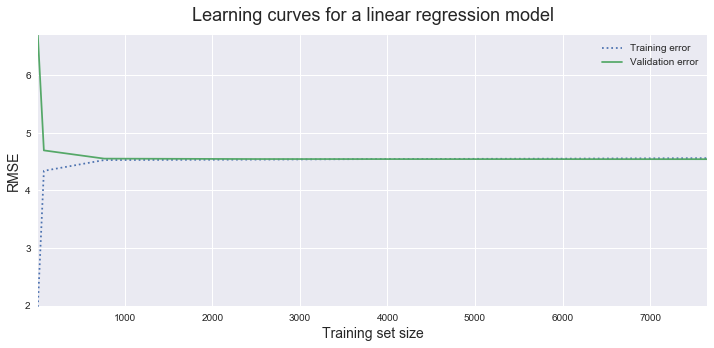

In [38]:
plt.figure(figsize = (12,5))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean**(1/2), linestyle=':',label = 'Training error')
plt.plot(train_sizes, validation_scores_mean**(1/2), label = 'Validation error')
plt.autoscale(enable=True, axis='both',tight=True)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

### Defining a function to computing the Learning Curve

In [39]:
def learning_curves(estimator, data, features, target, train_sizes, cv,scoring):
    """
    """
    train_sizes, train_scores, validation_scores = learning_curve(estimator, data[features],
                                                                  data[target], train_sizes =train_sizes,
                                                                  cv = cv, scoring = scoring)
    
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, linestyle=':', label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.ylabel(scoring, fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)
    return train_sizes, train_scores, validation_scores

## The Bias and Variance Problem Analysis

The training size:
[7, 76, 765, 2525, 4209, 5970, 7654]
The full data size:9568


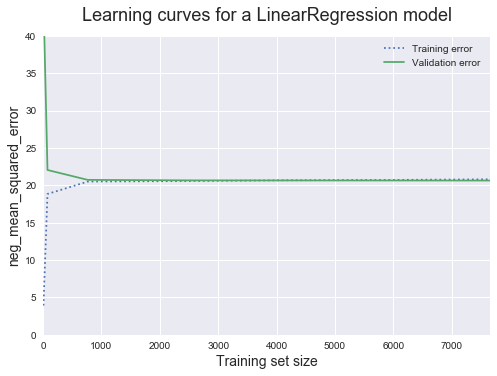

In [52]:
scoring = 'neg_mean_squared_error'
train_sizes, lr_train_scores, lr_validation_scores=learning_curves(LinearRegression(),
                                                                    electricity, features,
                                                                    target, train_sizes, cv,scoring)
print(Bold+'The training size:'+End)
print(train_sizes.tolist())
print(Bold+'The full data size:'+End +'%d'%len(electricity))

Based on Figure above, one can see clearly that when the training data has only one data point, the estimated model on this training data has no error on prediction, for example, MSE is equal to zero. This estimated model is simple so that it has a huge error when one uses it to make predictions based on the test dataset. In particular, MSE is almost 500. However, when the training data size increases, the MSE on the training data increases, whereas the MSE on the validation dataset reduces. In the end, these two indicators converge to the points of around 20.

Thus, we can conclude our Machine Learning with Linear Regression algorithm suffers from low variance, high bias, and underfitting. This finding is not surprising because the assumption about Linear Regression algorithm is very simple. To end this problem, following solutions should be considered

1. Adding more features.

2. Use other complex algorithm.

## Solution for high Bias, Low Variance, and Underfitting

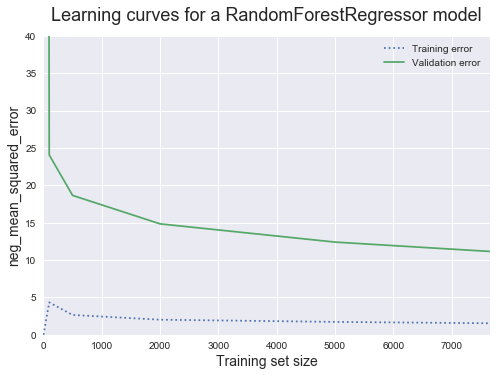

In [186]:
scoring = 'neg_mean_squared_error'
train_sizes, rfr_train_scores, rfr_validation_scores=learning_curves(RandomForestRegressor(),
                                                                     electricity, features, 
                                                                     target, train_sizes, cv,scoring)

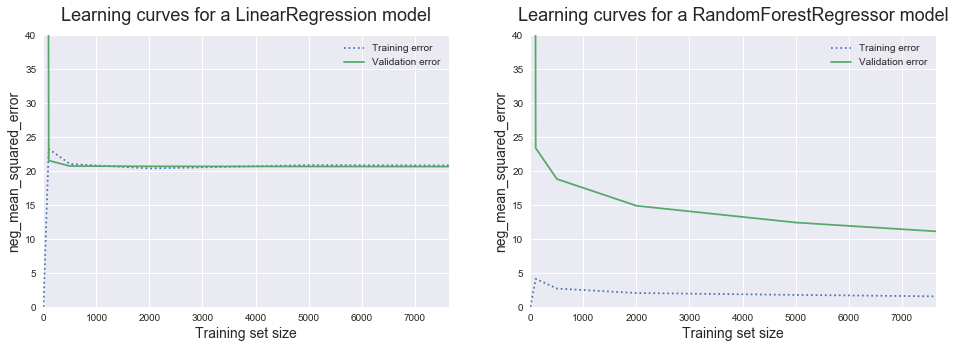

In [176]:
plt.figure(figsize = (16,5))
for model, i in [(LinearRegression(),1),(RandomForestRegressor(), 2)]:
    plt.subplot(1,2,i)
    train_sizes, rfr_train_scores, rfr_validation_scores=learning_curves(model,
                                                                     electricity, features, 
                                                                     target, train_sizes, cv,scoring)

$\textbf{Comments:}$ As analyzed before, the Machine Learning with Linear Regression algorithm suffers from low variance (a low gap between training and validation errors), high Bias (high errors in both training and validation datasets), and underfitting. To address this issue, we try to build a more complex model, such as the Random Forest Regressor. One can see that a new Machine Learning with the random forest algorithm still suffers from bias because of a high error on the validation dataset. However, high bias reduces in this new Machine Machine Learning. This is because the error on the training data in this new Machine Learning is much lower than that in the previous one. Thus, we can conclude that using a complex algorithm, such as the Random Forest Regressor, enables us to address the problem of Bias. However, it is not surprising that a low Bias implies a high variance. Indeed, the new Machine Learning with the Random Forest Regressor suffers from high variance because of a huge gap between errors in the training and validation datasets. Thus, this finding implies that the new Machine Learning with the Random Forest algorithm suffers from overffiting.

## Solution for Low Bias, High Variance, and Overfitting

1.  Adding more training instances.
2.  Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.
3. Reducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

In our case, we don’t have any other readily available data. We could go into the power plant and take some measurements. Let’s rather try to regularize our random forests algorithm. One way to do that is to adjust the maximum number of leaf nodes in each decision tree. This can be done by using the max_leaf_nodes parameter of RandomForestRegressor() as follows.

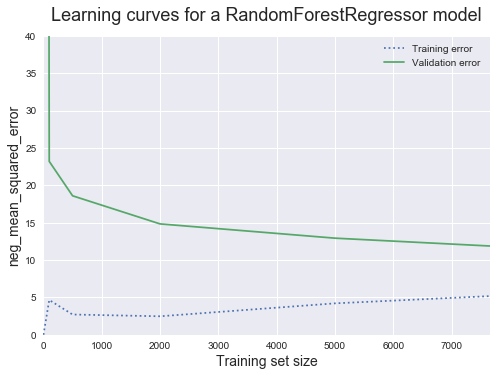

In [185]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]
scoring = 'neg_mean_squared_error'
train_sizes, rfr_train_scores, rfr_validation_scores=learning_curves(RandomForestRegressor(max_leaf_nodes =500),
                                                                     electricity, features, 
                                                                     target, train_sizes, cv,scoring)

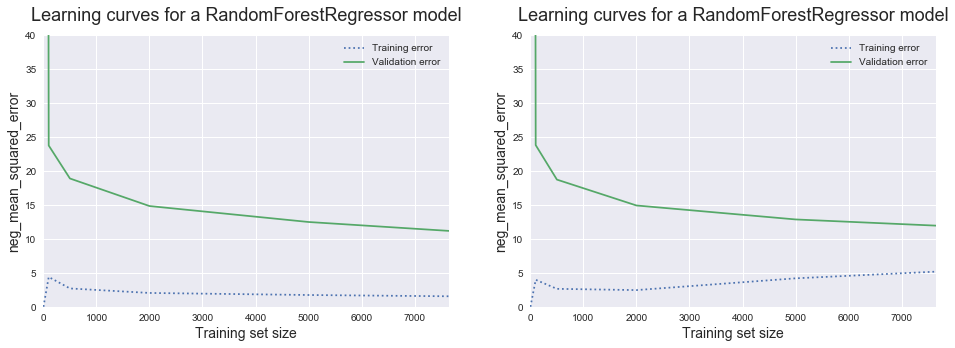

In [188]:
plt.figure(figsize = (16,5))
for model, i in [(RandomForestRegressor(),1),(RandomForestRegressor(max_leaf_nodes =500), 2)]:
    plt.subplot(1,2,i)
    train_sizes, rfr_train_scores, rfr_validation_scores=learning_curves(model,
                                                                     electricity, features, 
                                                                     target, train_sizes, cv,scoring)

In [189]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

One can see clearly the notable difference between two competing Machine Learning models. To overcome the problem of high variance and overfitting, we increase the regularization for our current learning algorithm. Indeed, we specify the maximum leaf nodes as 500. As a result, the gap between the errors in training and validation dataset reduces. It implies a decrease in variance.